In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
np.random.seed(123)
x1 = np.random.normal(2, 1, (200, 2))
y1 = np.zeros(200)

x2 = np.random.normal(5, 1, (200, 2))
y2 = np.ones(200)

X = np.vstack((x1, x2))
y = np.hstack((y1, y2))


In [ ]:
def activation_function(x):
    return np.where(x >= 0, 1, 0)

def train_perceptron(X, y, learning_rate=0.1, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        for i in range(len(y)):
            linear_output = np.dot(X[i], weights) + bias
            y_predicted = activation_function(linear_output)

            # Update weights and bias
            update = learning_rate * (y[i] - y_predicted)
            weights += update * X[i]
            bias += update

    return weights, bias

C:\Users\acer\AppData\Local\Temp\ipykernel_1972\2028367888.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot(X_vals, y_vals, 'k--', color='red', label='Decision Boundary')


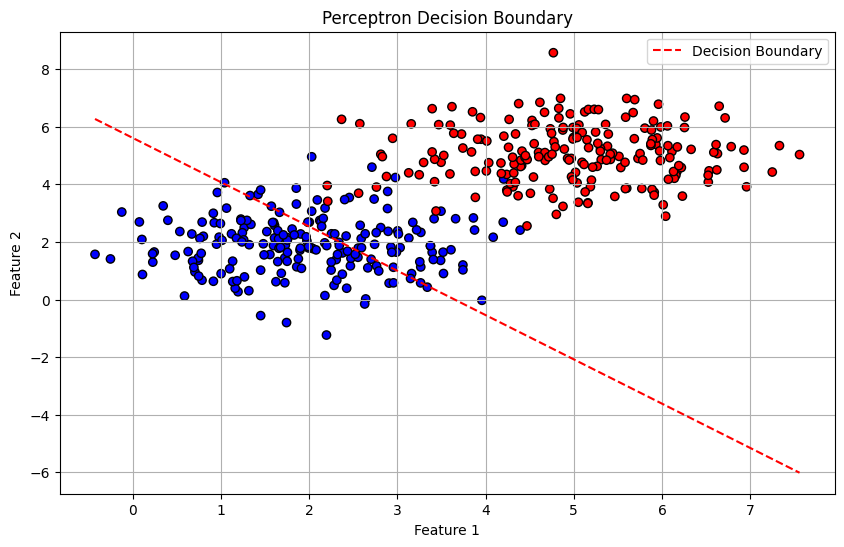

In [23]:
# Train the perceptron to get weights and bias
weights, bias = train_perceptron(X, y)

def plot_decision_boundary(X, y, weights, bias):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', marker='o', edgecolor='k')

    X_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    y_vals = -(weights[0] * X_vals + bias) / weights[1]
    plt.plot(X_vals, y_vals, 'k--', color='red', label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X, y, weights, bias)

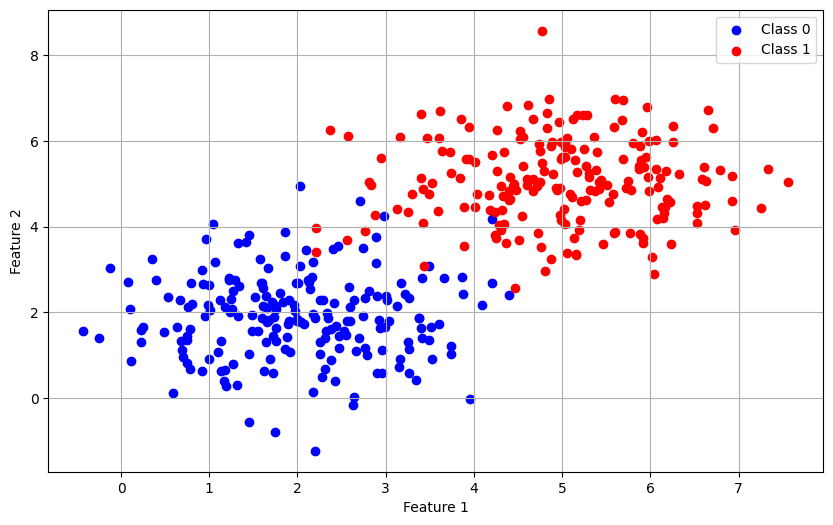

In [24]:
def plot_data(X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_data(X, y)

In [32]:
df[['Feature 1', 'Feature 2', 'Label']].to_csv('perceptron.csv', index=False)
print("Data fitur 1 dan fitur 2 berhasil disimpan ke fitur_only.csv")


Data fitur 1 dan fitur 2 berhasil disimpan ke fitur_only.csv


In [33]:
data = pd.read_csv('perceptron.csv')

In [39]:
# Baca ulang DataFrame dari file CSV
data = pd.read_csv('perceptron.csv')
X_new = data[['Feature 1', 'Feature 2']].values
y_new = data['Label'].values

# Set parameter training
learning_rate = 0.0001
epochs = 20

# Ulangi training perceptron dengan data yang dibaca ulang
weights_new, bias_new = train_perceptron(X_new, y_new, learning_rate=learning_rate, epochs=epochs)

print("Bobot hasil training ulang:", weights_new)
print("Bias hasil training ulang:", bias_new)
print("Epoch:", epochs)
print("Learning rate:", learning_rate)

# Hitung prediksi hasil perceptron
y_pred = activation_function(np.dot(X_new, weights_new) + bias_new)
print("Akurasi:", np.mean(y_pred == y_new))

Bobot hasil training ulang: [0.00099756 0.00037346]
Bias hasil training ulang: -0.0026999999999999993
Epoch: 20
Learning rate: 0.0001
Akurasi: 0.755
